In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Simulation de variables aléatoires
La librairie *numpy* permet de simuler de valeurs issues de plusieurs lois de probabilités usuelles. Il es possible d'obtenir les valeurs en forme de matrice avec l'argument *size*. Voyons quelques exemples :

In [4]:
# Simulation des valeurs issues d'une loi uniforme [0, 1]

nb_lignes = 1
nb_colonnes = 5
X = np.random.uniform(0, 1, size=[nb_lignes, nb_colonnes])
print(X)

[[0.44042409 0.91299886 0.547125   0.84782187 0.81491136]]


In [5]:
nb_lignes = 3
nb_colonnes = 5
X = np.random.uniform(0, 1, size=[nb_lignes, nb_colonnes])
print(X)

[[0.41281463 0.09521201 0.45283303 0.3030344  0.58791365]
 [0.83080032 0.43026482 0.62800766 0.62650153 0.18783608]
 [0.78604004 0.57394724 0.41493825 0.44976243 0.45113996]]


**Simulation d'une variable Uniforme dans l'intervalle $[a, b]$**

Si $X$ suit une loi uniforme dans $[0, 1]$, alors, $(b-a)X + a$ suit une loi Uniforme dans $[a, b]$.

In [6]:
a = -2
b = 5
U = np.random.uniform(0, 1, size=10)
X = (b-a) * U + a
print(U)
print(X)

[0.56747493 0.13365015 0.24916474 0.24597395 0.44308617 0.42545827
 0.25747843 0.36188848 0.88917538 0.90619204]
[ 1.97232448 -1.06444893 -0.25584679 -0.27818233  1.10160322  0.97820786
 -0.197651    0.53321936  4.22422767  4.34334431]


On peut aussi simuler ves valeurs issue d'une loi Uniforme dans $[a, b]$ avec :

```python
np.random.uniform(a, b, size=[nb_lignes, nb_colonnes])
```

**Simulation d'une loi Normale**

In [7]:
# Simulation des valeurs issues d'une loi Normal(0, 1)

m = 0
sigma = 1
nb_lignes = 1
nb_colonnes = 5
X = np.random.normal(loc=m, scale=sigma, size=[nb_lignes, nb_colonnes])
print(X)

[[ 1.04454841  1.1605706   2.17394067  0.51155638 -0.58410047]]


In [8]:
# Simulation des valeurs issues d'une loi Normal(0, 1)

m = 0
sigma = 1
nb_lignes = 3
nb_colonnes = 5
X = np.random.normal(loc=m, scale=sigma, size=[nb_lignes, nb_colonnes])
print(X)

[[-0.73020406  0.88927285 -0.02602152  0.02725174  0.75535461]
 [ 0.38060428  1.26187675 -0.73476021 -0.22065229 -0.75013845]
 [-0.92621143 -1.47519547  0.87295618  1.13561511 -0.31050978]]


Vous trouver plus de détails dans la [documentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) en ligne.

### Calcul de variance et covariance

Un estimateur pour la variance d'un vecteur aléatoire $Y=(Y_1, Y_2, \ldots, Y_n)$ est :

$$
\hbox{Var} = \frac{1}{n}\sum_{i=1}^{n}Y_{i}^{2} - \Big(\frac{1}{n}\sum_{i=1}^{n}Y_{i}\Big)^{2}
$$

De même, la covariance de deux vecteurs $X=(X_1, X_2, \ldots, X_n)$ et $Y=(Y_1, Y_2, \ldots, Y_n)$ est estimée par :

$$
\hbox{Cov}(X, Y) = \frac{1}{n}\sum_{i=1}^{n}(X_{i}Y_{i}) - \Big(\frac{1}{n}\sum_{i=1}^{n}X_{i}\Big)\Big(\frac{1}{n}\sum_{i=1}^{n}Y_{i}\Big)
$$

La fonction **numpy.cov** permet de calculer la matrice de Covariance de deux vecteurs. Voyons ça :

In [9]:
def variance(Y):
    # Compute the variance of Y
    n = Y.shape[1]
    varY = np.sum(Y**2) / n - (np.sum(Y) / n)**2
    return varY

def covariance(X, Y):
    # Compute the covariance cov(X, Y)
    n = X.shape[1]
    covXY = np.sum(X * Y) / n - np.sum(X) * np.sum(Y) / n**2
    return covXY


In [10]:
# Exemple : prenons une variable uniforme [0, 1] et une normal(0, 1)
n = 10000
X = np.random.uniform(0, 1, size=[1, n])
Y = np.random.normal(loc=0, scale=1, size=[1, n])
MCov_XY = np.cov(X, Y, bias=True)
VarX = variance(X)
VarY = variance(Y)
Cov_XY = covariance(X, Y)

In [11]:
print("Matrice de Covariance :")
print(MCov_XY)
print("Variance de X : {}".format(VarX))
print("Variance de Y : {}".format(VarY))
print("Cov(X, Y) : {}".format(Cov_XY))


Matrice de Covariance :
[[ 0.08281068 -0.00213724]
 [-0.00213724  1.02785976]]
Variance de X : 0.08281068123778318
Variance de Y : 1.0278597589298288
Cov(X, Y) : -0.0021372352329207213


Notez que :
```python
np.cov(X, Y)[0, 0]  # donne Var(X)
np.cov(X, Y)[1, 1]  # donne Var(Y)
np.cov(X, Y)[0, 1]  # donne Cov(X, Y)
```

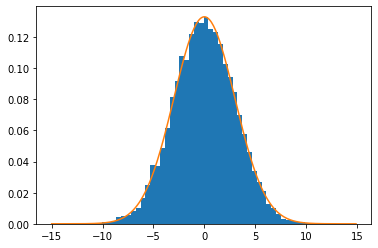

In [12]:
m = 0
sigma = 3
Y = np.random.normal(loc=m, scale=sigma, size=10000)
x = np.arange(-15, 15, 0.1)
y = norm.pdf(x, loc=m, scale=sigma)
plt.hist(Y, bins=50, density=True)
plt.plot(x, y)

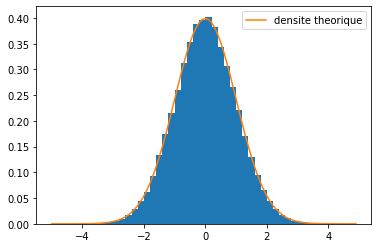

In [13]:
# TCL pour N variables aleatoires avec loi Uniforme [0, 1]

n = 100000
N = 100
E_X = 0.5
Var_X = 1/12
sigma_X = np.sqrt(Var_X)
bins = np.arange(-5, 5, 0.2)
X = np.random.uniform(0, 1, size=[n, N])
X_bar = np.mean(X, axis=1)
Z = np.sqrt(N) * (X_bar - E_X) / sigma_X
x = np.arange(-5, 5, 0.1)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(Z, bins=bins, density=True)
plt.plot(x, y, label="densite theorique")
plt.legend()
plt.show()

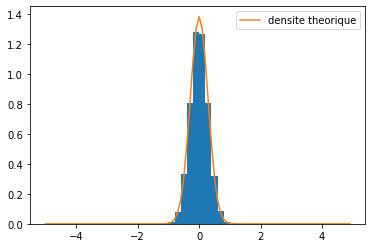

In [15]:
# TCL pour N variables aleatoires avec loi Uniforme [0, 1]

n = 100000
N = 100
E_X = 0.5
Var_X = 1/12
sigma_X = np.sqrt(Var_X)
bins = np.arange(-5, 5, 0.2)
X = np.random.uniform(0, 1, size=[n, N])
X_bar = np.mean(X, axis=1)
Z = np.sqrt(N) * (X_bar - E_X)  
x = np.arange(-5, 5, 0.1)
y = norm.pdf(x, loc=0, scale=sigma_X)
plt.hist(Z, bins=bins, density=True)
plt.plot(x, y, label="densite theorique")
plt.legend()
plt.show()